In [61]:
from __future__ import division
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math
import operator
import copy
import csv
import time
import random

from collections import Counter

In [4]:
# Import data into a dataframe
df = pd.read_csv("heart.csv")

### DATA EXPLORATION

In [5]:
# Data Exploration
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
# df.target.unique()
df['target'].unique()

array([1, 0], dtype=int64)

In [7]:
# Dataframe dimensions
df.shape[0]

303

Features are: 
> 1. age
> 2. sex
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved
> 9. exercise induced angina
> 10. oldpeak = ST depression induced by exercise relative to rest
> 11. the slope of the peak exercise ST segment
> 12. number of major vessels (0-3) colored by flourosopy
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

Target is:

> The "goal" field refers to the presence of heart disease in the patient. 

> 0 (no presence) , 1 (heart disease) 

In [8]:
df['target'].unique()

array([1, 0], dtype=int64)

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Preparing / Splitting the Data

In [28]:
# Creating features and targets

features_name = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','target']
                 
features = df[features_name]

# targets = df['target']

#Please split the data into training set (70%) , validation set (10%), test set (20%)

train_size = int(0.70 * features.shape[0])
validation_size = int(0.10 * features.shape[0])


# Training set (70% of all data rows) --> 212
train_features = features[:train_size]
# train_targets = targets[:train_size]

# Validation set (10% of all data rows) --> 30
validation_features = features[train_size : train_size + validation_size]
# validation_targets = targets[train_size: train_size + validation_size]

# Test set (20% of all data rows) --> 61
test_features = features[train_size + validation_size : ]
# test_targets = targets[train_size + validation_size: ]

print(features.shape, train_features.shape, validation_features.shape, test_features.shape)

(303, 14) (212, 14) (30, 14) (61, 14)


In [30]:
train_features.shape

(212, 14)

In [94]:
# train_features.to_csv("training_set.csv", index=False)
df.to_csv("dataset.csv", index=False)

### What is a Decision Tree

<img src="img/equation1.png">
<img src="img/equation2.png">

In [11]:
from numpy import log2 as log

# Machine epsilon
# The smallest representable positive number such that: 1.0 + eps != 1.0.
#  We used Machine Epsilon to avoid: log(0) or 0 in the denominator
eps = np.finfo(float).eps

In [12]:
# We need to find the ENTROPY and the
# INFORMATION GAIN for splitting the data set

# Calculating Entropy of column "target"

entropy_node = 0  #Initialize Entropy

# find unique valyes of "target"
values = df.target.unique()  #Unique objects - '0', '1'

# this calculates the entropy:

for value in values:
    # fraction is 'pm' --> proportion of # elements in a 
    #                    split group
    # example: how many '0's in total number of elements
    fraction = df.target.value_counts()[value]/len(df.target) 
    
    # summation
    entropy_node += - fraction * np.log2(fraction)

print("Entropy node = ", entropy_node)

Entropy node =  0.994264609261905


In [13]:
df.chol.unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131], dtype=int64)

In [14]:
attribute = 'chol'
target_variables = df.target.unique()  #This gives all '0' and '1'
variables = df[attribute].unique()    #This gives different features in that attribute (like '233')
entropy_attribute = 0
for variable in variables:
    entropy_each_feature = 0
    for target_variable in target_variables:
        num = len(df[attribute][df[attribute]==variable][df.target ==target_variable]) #numerator
        den = len(df[attribute][df[attribute]==variable])  #denominator
        fraction = num/(den+eps)  #pi
        entropy_each_feature += -fraction*log(fraction+eps) #This calculates entropy for one feature like 
    fraction2 = den/len(df)
    entropy_attribute += -fraction2*entropy_each_feature   #Sums up all the entropy 'chol'
    
abs(entropy_attribute)

0.43452808237653207

In [15]:
def find_entropy(df):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy
  
  
def find_entropy_attribute(df,attribute):
  Class = df.keys()[-1]   #To make the code generic, changing target variable class name
  target_variables = df[Class].unique()  #
  variables = df[attribute].unique()    #
  entropy2 = 0
  for variable in variables:
      entropy = 0
      for target_variable in target_variables:
          num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
          den = len(df[attribute][df[attribute]==variable])
          fraction = num/(den+eps)
          entropy += -fraction*log(fraction+eps)
      fraction2 = den/len(df)
      entropy2 += -fraction2*entropy
  return abs(entropy2)


def find_winner(df):
    Entropy_att = []
    IG = []
    for key in df.keys()[:-1]:
#         Entropy_att.append(find_entropy_attribute(df,key))
        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
    return df.keys()[:-1][np.argmax(IG)]
  
  
def get_subtable(df, node,value):
  return df[df[node] == value].reset_index(drop=True)


def buildTree(df,tree=None): 
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    
    #Here we build our decision tree

    #Get attribute with maximum information gain
    node = find_winner(df)
    
    #Get distinct value of that attribute e.g Salary is node and Low,Med and High are values
    attValue = np.unique(df[node])
    
    #Create an empty dictionary to create tree    
    if tree is None:                    
        tree={}
        tree[node] = {}
    
   #We make loop to construct a tree by calling this function recursively. 
    #In this we check if the subset is pure and stops if it is pure. 

    for value in attValue:
        
        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable['target'],return_counts=True)                        
        
        if len(counts)==1:#Checking purity of subset
            tree[node][value] = clValue[0]                                                    
        else:        
            tree[node][value] = buildTree(subtable) #Calling the function recursively 
                   
    return tree

In [17]:
tree = buildTree(df)


In [18]:
import pprint
pprint.pprint(tree)

{'chol': {126: 1,
          131: 0,
          141: 1,
          149: {'age': {49: 0, 71: 1}},
          157: 1,
          160: 1,
          164: 0,
          166: 0,
          167: 0,
          168: 1,
          169: 0,
          172: 0,
          174: 0,
          175: 1,
          176: 0,
          177: {'age': {43: 0, 46: 1, 59: 0, 65: 1}},
          178: 1,
          180: 1,
          182: 1,
          183: 1,
          184: 0,
          185: 0,
          186: 1,
          187: 0,
          188: 0,
          192: 1,
          193: {'age': {56: 1, 68: 0}},
          195: 1,
          196: 1,
          197: {'age': {44: 0, 46: 1, 53: 1, 58: 1, 63: 0, 76: 1}},
          198: {'age': {35: 0, 41: 1}},
          199: 1,
          200: 0,
          201: 1,
          203: {'age': {41: 1, 53: 0, 61: 0}},
          204: {'age': {29: 1, 41: 1, 46: 1, 47: 1, 52: 0, 59: 0}},
          205: {'age': {52: 1, 55: 0}},
          206: 0,
          207: {'age': {57: 1, 61: 0}},
          208: 1,
     

In [19]:
def predict(inst,tree):
    #This function is used to predict for any input variable 
    
    #Recursively we go through the tree that we built earlier

    for nodes in tree.keys():        
        
        value = inst[nodes]
        tree = tree[nodes][value]
        prediction = 0
            
        if type(tree) is dict:
            prediction = predict(inst, tree)
        else:
            prediction = tree
            break;                            
        
    return prediction

In [20]:
inst = df.iloc[6]  #This takes row with index 6


In [21]:
inst

age          56.0
sex           0.0
cp            1.0
trestbps    140.0
chol        294.0
fbs           0.0
restecg       0.0
thalach     153.0
exang         0.0
oldpeak       1.3
slope         1.0
ca            0.0
thal          2.0
target        1.0
Name: 6, dtype: float64

In [22]:
data = {'age':56.0, 'sex':0.0, 'cp':1.0, 'trestbps':140.0, 'chol':294.0, 'fbs':0.0, 'restecg':0.0, 'thalach':153.0, 'exang':0.0, 'oldpeak':1.3, 'slope':1.0, 'ca':0.0, 'thal':2.0}
inst = pd.Series(data)

In [23]:
prediction = predict(inst, tree)
prediction

1

### C4.5

In [95]:
# csvdata class to store the csv data
class csvdata():
    def __init__(self, classifier):
        self.rows = []
        self.attributes = []
        self.attribute_types = []
        self.classifier = classifier
        self.class_col_index = None

# the node class that will make up the tree
class decisionTreeNode():
    def __init__(self, is_leaf_node, classification, attribute_split_index, attribute_split_value, parent, left_child, right_child, height):

        self.classification = None
        self.attribute_split = None
        self.attribute_split_index = None
        self.attribute_split_value = None
        self.parent = parent
        self.left_child = None
        self.right_child = None
        self.height = None
        self.is_leaf_node = True

def preprocessing(dataset):

    #convert attributes that are numeric to floats. 
    for example in dataset.rows:
        for x in range(len(dataset.rows[0])):
            if dataset.attributes[x] == 'True':
                example[x] = float(example[x])


# compute the decision tree recursively

def compute_decision_tree(dataset, parent_node, classifier, cut_off_value):
    
    node = decisionTreeNode(True, None, None, None, parent_node, None, None, 0)
    if (parent_node == None):
        node.height = 0
    else:
        node.height = node.parent.height + 1

    #count_positives() will count the number of rows with classification "1"
    ones = count_positives(dataset.rows, dataset.attributes, classifier)

    if (len(dataset.rows) == ones):
        node.classification = 1
        node.is_leaf_node = True
        return node
    elif (ones == 0):
        node.is_leaf_node = True
        node.classification = 0
        return node
    else:
        node.is_leaf_node = False

    # The index of the attribute we will split on
    splitting_attribute = None

    # The information gain given by the best attribute
    maximum_info_gain = 0

    split_val = None

    # CUT-OFF VALUES : 
    # [0.2, 0.4, 0.6, 0.8]
    minimum_info_gain = cut_off_value/10

    entropy = calculate_entropy(dataset, classifier)

    #for each column of data
    for attr_index in range(len(dataset.rows[0])):

        if (dataset.attributes[attr_index] != classifier):
            local_max_gain = 0
            local_split_val = None
            attr_value_list = [example[attr_index] for example in dataset.rows] # these are the values we can split on, now we must find the best one
            attr_value_list = list(set(attr_value_list)) # remove duplicates from list of all attribute values

            if(len(attr_value_list) > 100):
                attr_value_list = sorted(attr_value_list)
                total = len(attr_value_list)
                ten_percentile = int(total/10)
                new_list = []
                for x in range(1, 10):
                    new_list.append(attr_value_list[x*ten_percentile])
                attr_value_list = new_list

            for val in attr_value_list:
                # calculate the gain if we split on this value
                # if gain is greater than local_max_gain, save this gain and this value
                current_gain = calculate_information_gain(attr_index, dataset,val,entropy)

                if (current_gain > local_max_gain):
                    local_max_gain = current_gain
                    local_split_val = val

            if (local_max_gain > maximum_info_gain):
                maximum_info_gain = local_max_gain
                split_val = local_split_val
                splitting_attribute = attr_index
                
    
    # CUT-OFF VALUES : 
    # [0.2, 0.4, 0.6, 0.8]
    if (maximum_info_gain <= minimum_info_gain or node.height > 20):
        
        node.is_leaf_node = True
        node.classification = classify_leaf(dataset, classifier)
        return node

    node.attribute_split_index = splitting_attribute
    node.attribute_split = dataset.attributes[splitting_attribute]
    node.attribute_split_value = split_val

    left_dataset = csvdata(classifier)
    right_dataset = csvdata(classifier)

    left_dataset.attributes = dataset.attributes
    right_dataset.attributes = dataset.attributes

    left_dataset.attribute_types = dataset.attribute_types
    right_dataset.attribute_types = dataset.attribute_types

    for row in dataset.rows:
        if (splitting_attribute is not None and row[splitting_attribute] >= split_val):
            left_dataset.rows.append(row)
        elif (splitting_attribute is not None):
            right_dataset.rows.append(row)

    node.left_child = compute_decision_tree(left_dataset, node, classifier, cut_off_value)
    node.right_child = compute_decision_tree(right_dataset, node, classifier, cut_off_value)

    return node

# Classify dataset
def classify_leaf(dataset, classifier):
    ones = count_positives(dataset.rows, dataset.attributes, classifier)
    total = len(dataset.rows)
    zeroes = total - ones
    if (ones >= zeroes):
        return 1
    else:
        return 0


# Final evaluation of the data
def get_classification(example, node, class_col_index):
    if (node.is_leaf_node == True):
        return node.classification
    else:
        if (example[node.attribute_split_index] >= node.attribute_split_value):
            return get_classification(example, node.left_child, class_col_index)
        else:
            return get_classification(example, node.right_child, class_col_index)

##################################################
# Calculate the entropy of the current dataset
##################################################
def calculate_entropy(dataset, classifier):

    #get count of all the rows with classification 1
    ones = count_positives(dataset.rows, dataset.attributes, classifier)

    #get the count of all the rows in the dataset.
    total_rows = len(dataset.rows);
    #from the above two we can get the count of rows with classification 0 too

    #Entropy formula is sum of p*log2(p). Referred the slides. P is the probability
    entropy = 0

    #probability p of classification 1 in total data
    p = ones / total_rows
    if (p != 0):
        entropy += p * math.log(p, 2)
    #probability p of classification 0 in total data
    p = (total_rows - ones)/total_rows
    if (p != 0):
        entropy += p * math.log(p, 2)

    #from the formula
    entropy = -entropy
    return entropy

##################################################
# Calculate the gain of a particular attribute split
##################################################
def calculate_information_gain(attr_index, dataset, val, entropy):

    classifier = dataset.attributes[attr_index]
    attr_entropy = 0
    total_rows = len(dataset.rows);
    gain_upper_dataset = csvdata(classifier)
    gain_lower_dataset = csvdata(classifier)
    gain_upper_dataset.attributes = dataset.attributes
    gain_lower_dataset.attributes = dataset.attributes
    gain_upper_dataset.attribute_types = dataset.attribute_types
    gain_lower_dataset.attribute_types = dataset.attribute_types

    for example in dataset.rows:
        if (example[attr_index] >= val):
            gain_upper_dataset.rows.append(example)
        elif (example[attr_index] < val):
            gain_lower_dataset.rows.append(example)

    if (len(gain_upper_dataset.rows) == 0 or len(gain_lower_dataset.rows) == 0):
        return -1

    attr_entropy += calculate_entropy(gain_upper_dataset, classifier) * len(gain_upper_dataset.rows) / total_rows
    attr_entropy += calculate_entropy(gain_lower_dataset, classifier) * len(gain_lower_dataset.rows) / total_rows

    return entropy - attr_entropy

##################################################
# count number of rows with classification "1"
##################################################
def count_positives(instances, attributes, classifier):
    count = 0
    class_col_index = None

    #find the index of classifier
    for a in range(len(attributes)):
        if attributes[a] == classifier:
            class_col_index = a
        else:
            class_col_index = len(attributes) - 1
    for i in instances:
        if i[class_col_index] == "1":
            count += 1
    return count


def validate_tree(node, dataset):
    total = len(dataset.rows)
    correct = 0
    for row in dataset.rows:
        # validate example
        correct += validate_row(node, row)
    return correct/total

# Validate row (for finding best score before pruning)
def validate_row(node, row):
    if (node.is_leaf_node == True):
        projected = node.classification
        actual = int(row[-1])
        if (projected == actual):
            return 1
        else:
            return 0
    value = row[node.attribute_split_index]
    if (value >= node.attribute_split_value):
        return validate_row(node.left_child, row)
    else:
        return validate_row(node.right_child, row)

##################################################
# Prune tree
##################################################
def prune_tree(root, node, validate_set, best_score):
    # if node is a leaf
    if (node.is_leaf_node == True):
        classification = node.classification
        node.parent.is_leaf_node = True
        node.parent.classification = node.classification
        if (node.height < 20):
            new_score = validate_tree(root, validate_set)
        else:
            new_score = 0

        if (new_score >= best_score):
            return new_score
        else:
            node.parent.is_leaf_node = False
            node.parent.classification = None
            return best_score
    # if its not a leaf
    else:
        new_score = prune_tree(root, node.left_child, validate_set, best_score)
        if (node.is_leaf_node == True):
            return new_score
        new_score = prune_tree(root, node.right_child, validate_set, new_score)
        if (node.is_leaf_node == True):
            return new_score

        return new_score



In [96]:
def run_decision_tree(cut_off_value):

    dataset = csvdata("")
    training_set = csvdata("")
    test_set = csvdata("")

    # Load data set
    #with open("data.csv") as f:
    #    dataset.rows = [tuple(line) for line in csv.reader(f, delimiter=",")]
    #print "Number of records: %d" % len(dataset.rows)
    
    f = open("dataset.csv")
    original_file = f.read()
    rowsplit_data = original_file.splitlines()
    dataset.rows = [rows.split(',') for rows in rowsplit_data]


    dataset.attributes = dataset.rows.pop(0)
    print(dataset.attributes)

    # this is used to generalize the code for other datasets.
    # true indicates numeric data. false in nominal data
    dataset.attribute_types = ['true', 'true', 'true', 'true', 'true', 'true', 'true', 'true', 'true', 'true', 'true', 'false']


    classifier = dataset.attributes[-1]
    dataset.classifier = classifier


    # find index of classifier
    for a in range(len(dataset.attributes)):
        if dataset.attributes[a] == dataset.classifier:
            dataset.class_col_index = a
        else:
            dataset.class_col_index = range(len(dataset.attributes))[-1]

    print("classifier is %d" % dataset.class_col_index)
    
    # preprocessing the dataset
    preprocessing(dataset)

    training_set = copy.deepcopy(dataset)
    training_set.rows = []
    
    test_set = copy.deepcopy(dataset)
    test_set.rows = []
    
    validate_set = copy.deepcopy(dataset)
    validate_set.rows = []
    
    
    # Split training/test sets
    # You need to modify the following code for cross validation.

    ##This is to create a validation set for post pruning
    dataset.rows = [x for i, x in enumerate(dataset.rows) if i % 10 != 9]
    validate_set.rows = [x for i, x in enumerate(dataset.rows) if i % 10 == 9]

    K=10
    # Stores accuracy of the 10 runs
    accuracy = []
    start =  time.process_time()
    for k in range(K):
        print("Doing fold ", k)
        training_set.rows = [x for i, x in enumerate(dataset.rows) if i % K != k]
        test_set.rows = [x for i, x in enumerate(dataset.rows) if i % K == k]

        print("Number of training records: %d" % len(training_set.rows))
        print("Number of test records: %d" % len(test_set.rows))
        root = compute_decision_tree(training_set, None, classifier, cut_off_value)

        # Classify the test set using the tree we just constructed
        results = []
        
        for instance in test_set.rows:
            result = get_classification(instance, root, test_set.class_col_index)
            results.append(str(result) == str(instance[-1]))

        # Accuracy
        acc = float(results.count(True))/float(len(results))
        print("accuracy: %.4f" % acc)

        # pruning code:
        best_score = validate_tree(root, validate_set)
        post_prune_accuracy = 100*prune_tree(root, root, validate_set, best_score)
        print("Post-pruning score on validation set: " + str(post_prune_accuracy) + "%")
        
        accuracy.append(acc)
        del root

    mean_accuracy = math.fsum(accuracy)/10
    print("Accuracy  %f " % (mean_accuracy))
    print("Took %f secs" % ( time.process_time() - start))
    # Writing results to a file (DO NOT CHANGE)
    f = open("result.txt", "w")
    f.write("accuracy: %.4f" % mean_accuracy)
    f.close()


In [97]:
cut_off = 0.2
run_decision_tree(cut_off)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
classifier is 13
Doing fold  0
Number of training records: 245
Number of test records: 28
accuracy: 0.8214
Post-pruning score on validation set: 100.0%
Doing fold  1
Number of training records: 245
Number of test records: 28
accuracy: 0.8214
Post-pruning score on validation set: 100.0%
Doing fold  2
Number of training records: 245
Number of test records: 28
accuracy: 0.8571
Post-pruning score on validation set: 100.0%
Doing fold  3
Number of training records: 246
Number of test records: 27
accuracy: 0.7778
Post-pruning score on validation set: 100.0%
Doing fold  4
Number of training records: 246
Number of test records: 27
accuracy: 0.7407
Post-pruning score on validation set: 100.0%
Doing fold  5
Number of training records: 246
Number of test records: 27
accuracy: 0.7037
Post-pruning score on validation set: 100.0%
Doing fold  6
Number of training records: 246
Numb

In [98]:
cut_off = 0.4
run_decision_tree(cut_off)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
classifier is 13
Doing fold  0
Number of training records: 245
Number of test records: 28
accuracy: 0.8214
Post-pruning score on validation set: 100.0%
Doing fold  1
Number of training records: 245
Number of test records: 28
accuracy: 0.8214
Post-pruning score on validation set: 100.0%
Doing fold  2
Number of training records: 245
Number of test records: 28
accuracy: 0.8571
Post-pruning score on validation set: 100.0%
Doing fold  3
Number of training records: 246
Number of test records: 27
accuracy: 0.7778
Post-pruning score on validation set: 100.0%
Doing fold  4
Number of training records: 246
Number of test records: 27
accuracy: 0.7407
Post-pruning score on validation set: 100.0%
Doing fold  5
Number of training records: 246
Number of test records: 27
accuracy: 0.7037
Post-pruning score on validation set: 100.0%
Doing fold  6
Number of training records: 246
Numb

In [92]:
cut_off = 0.6
run_decision_tree(cut_off)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
classifier is 13
Doing fold  0
Number of training records: 171
Number of test records: 20
accuracy: 0.8500
Post-pruning score on validation set: 100.0%
Doing fold  1
Number of training records: 172
Number of test records: 19
accuracy: 0.8947
Post-pruning score on validation set: 94.73684210526315%
Doing fold  2
Number of training records: 172
Number of test records: 19
accuracy: 1.0000
Post-pruning score on validation set: 94.73684210526315%
Doing fold  3
Number of training records: 172
Number of test records: 19
accuracy: 0.7368
Post-pruning score on validation set: 94.73684210526315%
Doing fold  4
Number of training records: 172
Number of test records: 19
accuracy: 0.8421
Post-pruning score on validation set: 94.73684210526315%
Doing fold  5
Number of training records: 172
Number of test records: 19
accuracy: 0.8421
Post-pruning score on validation set: 94.736842

In [99]:
cut_off = 0.8
run_decision_tree(cut_off)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
classifier is 13
Doing fold  0
Number of training records: 245
Number of test records: 28
accuracy: 0.8214
Post-pruning score on validation set: 100.0%
Doing fold  1
Number of training records: 245
Number of test records: 28
accuracy: 0.8214
Post-pruning score on validation set: 100.0%
Doing fold  2
Number of training records: 245
Number of test records: 28
accuracy: 0.8571
Post-pruning score on validation set: 100.0%
Doing fold  3
Number of training records: 246
Number of test records: 27
accuracy: 0.8148
Post-pruning score on validation set: 100.0%
Doing fold  4
Number of training records: 246
Number of test records: 27
accuracy: 0.7407
Post-pruning score on validation set: 100.0%
Doing fold  5
Number of training records: 246
Number of test records: 27
accuracy: 0.7407
Post-pruning score on validation set: 100.0%
Doing fold  6
Number of training records: 246
Numb

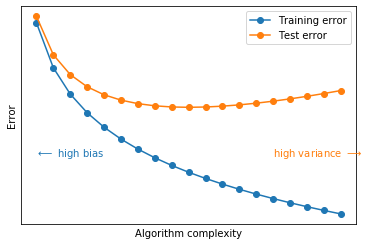

In [90]:
complexity = np.arange(0.1, 2, 0.1)
train_error = -np.log(complexity)
test_error = -np.log(complexity) + np.power(complexity, 1)

plt.xticks([])
plt.yticks([])

plt.xlabel("Algorithm complexity")
plt.ylabel("Error")

plt.plot(complexity, train_error, 'C0o-', label='Training error')
plt.plot(complexity, test_error, 'C1o-', label="Test error")

plt.text(0.1, 0.25, "$\longleftarrow$ high bias", color='C0')
plt.text(1.5, 0.25, "high variance $\longrightarrow$", color='C1')

plt.legend();